In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os
import glob
import pickle
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt
plt.tight_layout()
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from sklearn.linear_model import LinearRegression

<Figure size 640x480 with 0 Axes>

## Read the final saved dataframes containing features and targets

In [2]:
with open('model/df_train.pickle', 'rb') as handle:
    df_train = pickle.load(handle)

with open('model/df_test.pickle', 'rb') as handle:
    df_test = pickle.load(handle)

print(df_train.shape, df_test.shape)

(1000, 77) (500, 77)


In [3]:
df_train.head()

,feature_overall,feature_revenue_1,feature_revenue_2,feature_revenue_3,feature_profit_1,feature_profit_2,feature_debt_1,feature_cashflow_2,feature_dividend,feature_management_1,feature_management_2,feature_industry_1,feature_industry_2,feature_research,feature_guidance,feature_leadership,feature_macro,feature_diversification,feature_customerbase,feature_esg,feature_competition_1,feature_competition_2,feature_ip,feature_digitaltransformation,feature_regulations,feature_onlinepresence,feature_legal,meta_symbol,meta_report_date,target_max,target_min,target_3m,target_6m,target_9m,target_12m,sp500_max,sp500_min,sp500_3m,sp500_6m,sp500_9m,sp500_12m,report_date,start_date,end_date,symbol,era,target_max_normalised,target_min_normalised,target_3m_normalised,target_6m_normalised,target_9m_normalised,target_12m_normalised,target_custom_1,target_custom_2,target_custom_3,target_custom_4,target_custom_5,target_custom_6,target_custom_7,target_custom_8,target_custom_9,target_custom_10,target_custom_11,target_custom_12,target_custom_13,target_custom_14,target_custom_15,target_custom_16,target_custom_17,target_custom_18,target_custom_19,target_custom_20,target_custom_21,target_custom_22,target_custom_23,target_custom_24,id
0,0.70,0.5,0.9,0.80,0.8,0.90,0.5,0.8,0.4,0.8,0.70,0.8,0.85,0.00,0.7,0.9,0.7,0.9,0.80,1.00,0.6,0.8,0.70,0.7,0.00,0.7,0.30,TILE,2005-03-17,60.052497,-17.971160,2.228078,15.727405,15.334197,71.952808,9.082529,-2.675466,2.802880,3.712679,7.514906,10.072817,2005-03-17,2005-03-19,2006-03-15,TILE,2005,1.082687,-0.777537,-0.093806,0.448650,0.214027,1.483677,1.00,0.75,1.000,0.667,0.25,0.25,0.167,0.333,0.50,0.50,0.500,0.500,0.75,0.50,0.667,0.500,0.50,0.50,0.667,0.500,1.00,0.75,1.000,0.833,TILE_2005-03-17
1,0.70,0.7,0.7,0.90,0.0,0.80,0.5,0.8,0.2,0.8,0.80,0.7,0.80,0.65,0.8,0.7,0.6,0.8,0.75,0.80,0.7,0.7,0.80,0.7,0.50,0.0,0.20,GM,2012-02-27,14.842408,-25.734063,-13.758658,-16.487339,-8.339753,10.184441,10.738236,-4.215044,-3.504489,3.500815,-0.424700,11.324021,2012-02-27,2012-02-29,2013-02-13,GM,2012,-0.429552,-1.066219,-0.918954,-1.241205,-0.846209,-0.429552,0.25,0.50,0.333,0.500,0.00,0.25,0.000,0.333,0.00,0.25,0.167,0.333,0.00,0.25,0.000,0.333,0.00,0.25,0.167,0.333,0.25,0.50,0.333,0.500,GM_2012-02-27
2,0.80,0.7,0.7,0.60,0.7,0.85,0.3,0.6,0.8,0.8,0.75,0.4,0.70,0.80,0.7,0.2,0.6,0.8,0.80,0.85,0.7,0.6,0.90,0.8,0.80,0.8,0.30,HSY,2015-02-20,-3.129790,-19.199837,-11.239747,-17.414022,-16.792799,-12.235398,0.776786,-11.599504,0.777383,-10.259945,-0.972670,-8.525538,2015-02-20,2015-02-22,2016-02-24,HSY,2015,-2.185070,-0.169085,-1.219954,-0.900825,-0.866134,-0.287650,0.00,0.00,0.000,0.000,0.50,0.50,0.500,0.500,0.00,0.25,0.000,0.333,0.00,0.25,0.167,0.333,0.00,0.25,0.167,0.333,0.25,0.50,0.333,0.500,HSY_2015-02-20
3,0.45,0.0,0.0,0.75,0.0,0.80,0.7,0.2,0.0,0.7,0.60,0.2,0.70,0.70,0.3,0.3,0.6,0.0,0.20,0.20,0.3,0.6,0.80,0.7,0.85,0.0,0.50,VNDA,2011-03-10,8.983427,-38.403313,-3.591157,-23.756904,-30.801100,-38.259669,5.345030,-13.301959,-1.960061,-8.522897,-2.729117,4.338200,2011-03-10,2011-03-12,2012-03-07,VNDA,2011,-0.415910,-1.057910,-0.498859,-0.825144,-1.129836,-1.852326,0.25,0.50,0.333,0.500,0.00,0.25,0.167,0.333,0.25,0.50,0.333,0.500,0.25,0.25,0.167,0.333,0.00,0.25,0.000,0.333,0.00,0.00,0.000,0.167,VNDA_2011-03-10
4,0.70,0.7,0.4,0.75,0.8,0.60,0.3,0.6,0.8,0.8,0.90,0.8,0.80,0.00,0.6,0.6,0.7,0.8,0.80,0.00,0.7,0.9,0.85,0.7,0.00,0.8,0.85,HMN,2002-03-29,6.749484,-39.485365,-15.582636,-31.782225,-29.122881,-36.831132,-1.784438,-30.161708,-13.668954,-25.432171,-22.159721,-23.706111,2002-03-29,2002-03-31,2003-03-25,HMN,2002,-0.455934,-0.652525,-0.833279,-0.861319,-0.805879,-0.968464,0.25,0.50,0.333,0.500,0.25,0.50,0.167,0.500,0.25,0.25,0.167,0.333,0.00,0.25,0.167,0.333,0.25,0.25,0.167,0.333,0.00,0.25,0.167,0.333,HMN_2002-03-29


In [4]:
sorted(df_train.era.unique())

[2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [5]:
sorted(df_test.era.unique())

[2018, 2019, 2020, 2021, 2022]

In [6]:
feature_cols = [c for c in df_train.columns if c.startswith('feature')]
len(feature_cols)

27

In [7]:
# target_custom_22 corresponds to target created from 12 month normalised returns per year (aka era) and then binned
# refer make_targets.py for more details
df_train['target_custom_22'].unique()

array([0.75, 0.5 , 0.  , 0.25, 1.  ], dtype=float32)

In [8]:
# target_custom_2 corresponds to target created from max normalised returns in the span of 12 months per year (aka era) and then binned
# refer make_targets.py for more details
df_train['target_custom_2'].unique()

array([0.75, 0.5 , 0.  , 0.25, 1.  ], dtype=float32)

**Note**: '12 month normalised' returns refers to returns during the period between 2 successive annual report filings.
'max normalised returns' also refers to the same period but calculates returns from the annual report date to the date 
when max return ($98^{th}$ percentile) was achieved during that period

## Linear Regression Model

In [9]:
reg_12m = LinearRegression(positive=True).fit(df_train[feature_cols], 
                                           df_train['target_custom_22'])
reg_max = LinearRegression(positive=True).fit(df_train[feature_cols], 
                                           df_train['target_custom_2'])

df_test['pred_reg_12m'] = reg_12m.predict(df_test[feature_cols])
df_test['pred_reg_max'] = reg_max.predict(df_test[feature_cols])

In [10]:
reg_12m.coef_

array([0.05887064, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04410398,
       0.        , 0.        , 0.        , 0.        , 0.04454653,
       0.        , 0.        , 0.02784737, 0.03985874, 0.00051874,
       0.        , 0.        , 0.00249217, 0.        , 0.        ,
       0.06604518, 0.02632756])

In [11]:
reg_max.coef_

array([0.00340838, 0.        , 0.        , 0.00490737, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01545072,
       0.        , 0.        , 0.01442009, 0.        , 0.        ,
       0.        , 0.        , 0.0083701 , 0.        , 0.        ,
       0.04991859, 0.06003111])

## Analyse top predicted stocks

In [12]:
def calc_returns(df_test, top_k, returns_col, pred_col):
    '''
    Function to calculate the mean returns across all years.
    Finds out the top predicted stocks each year and then computes mean returns.
    Args:
        df_test: Test df containing the return column and the predicted column.
        top_k: Top 'k' stocks to select based on 'pred_col'.
        returns_col: Column containing the raw returns for that period.
        pred_col: Column containing the prediction of the ML model.
    Returns:
        Dictionary with Mean returns of predicted stocks and the S&P500 index for the same duration.
        Results are averaged across all years.
    '''
    ret_dict = {}
    #Get list of top_k predicted stocks for each year (aka era)
    top_pred_id_list = list(df_test.groupby('era', group_keys=False).apply(lambda d: d.sort_values(by=pred_col, ascending=False).iloc[:top_k]['id']))
    
    #Filter the df to contain only top_k predicted stocks
    df_toppred = df_test.loc[lambda x: x['id'].isin(top_pred_id_list)].sort_values(by='era')

    #Compute the average returns in each year. The resulting df will contain percent returns for each year. 
    returns_agg_df = df_toppred.loc[:, ['era', 'sp500_{}'.format(returns_col), 'target_{}'.format(returns_col)]].groupby('era').agg('mean')

    ret_dict['top_k'] = top_k
    #Calculate average percent returns across all years.
    ret_dict['sp500_mean'] = returns_agg_df['sp500_{}'.format(returns_col)].mean()
    ret_dict['gpt_mean'] = returns_agg_df['target_{}'.format(returns_col)].mean()
    return ret_dict

In [13]:
#Find top stocks based on prediction by 'reg_12m' model.
#Calculate returns for entire 12 month duration
df_eval_12m = pd.DataFrame()

#k denotes the number of top stocks to be selected per year.
for k in range(1, 21):
    curr_df = pd.DataFrame.from_dict(calc_returns(df_test, k, returns_col='12m', pred_col='pred_reg_12m'), orient='index').T
    curr_df.set_index('top_k', inplace=True)
    df_eval_12m = pd.concat([df_eval_12m, curr_df], ignore_index=False)

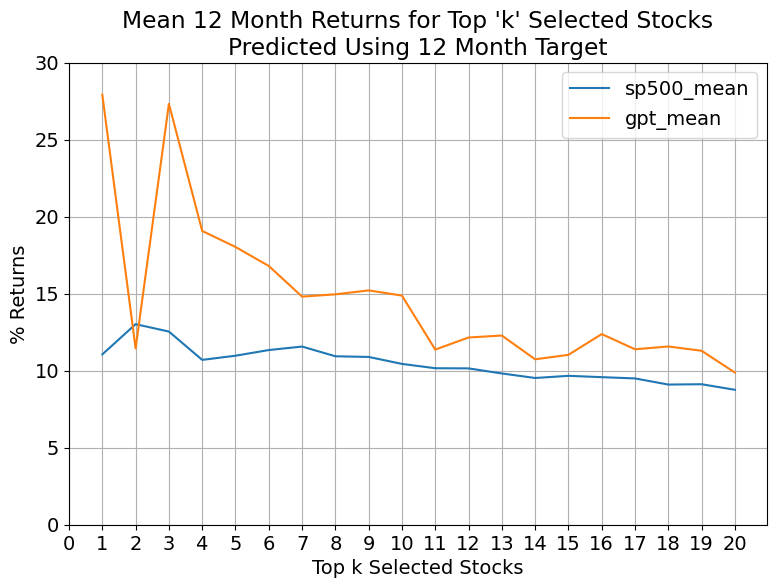

In [14]:
df_eval_12m.loc[:, ['sp500_mean', 'gpt_mean']].plot(figsize=(9,6))
plt.grid()
plt.title("Mean 12 Month Returns for Top 'k' Selected Stocks\nPredicted Using 12 Month Target")
plt.ylabel('% Returns')
plt.ylim(0, 30)
plt.xticks(range(0, 21, 1))
plt.xlabel('Top k Selected Stocks')
plt.savefig("plots/12mReturns_12mTarget.png", dpi=300)

In [15]:
#Find top stocks based on prediction by 'reg_max' model.
#Calculate returns for entire 12 month duration
df_eval_max = pd.DataFrame()

#k denotes the number of top stocks to be selected per year.
for k in range(1, 21):
    curr_df = pd.DataFrame.from_dict(calc_returns(df_test, k, returns_col='12m', pred_col='pred_reg_max'), orient='index').T
    curr_df.set_index('top_k', inplace=True)
    df_eval_max = pd.concat([df_eval_max, curr_df], ignore_index=False)

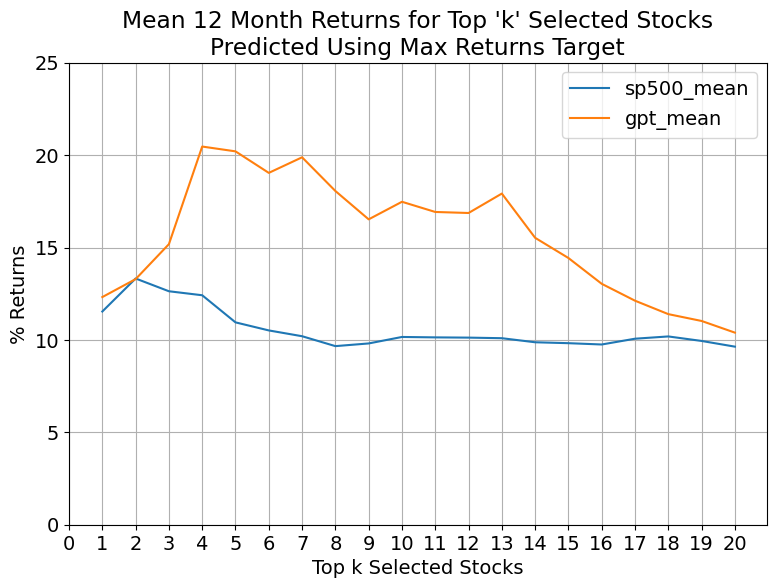

In [16]:
df_eval_max.loc[:, ['sp500_mean', 'gpt_mean']].plot(figsize=(9,6))
plt.grid()
plt.title("Mean 12 Month Returns for Top 'k' Selected Stocks\nPredicted Using Max Returns Target")
plt.ylabel('% Returns')
plt.ylim(0, 25)
plt.xticks(range(0, 21, 1))
plt.xlabel('Top k Selected Stocks')
plt.savefig("plots/12mReturns_maxTarget.png", dpi=300)

## Calculate Value of $1 invested at start of 2018

In [17]:
def plot_accumulated_value(df_test, top_k, returns_col, pred_col, title):
    top_pred_id_list = list(df_test.groupby('era', group_keys=False).apply(lambda d: d.sort_values(by=pred_col, ascending=False)\
                                                                           .iloc[:top_k]['id']))
    df_toppred = df_test.loc[lambda x: x['id'].isin(top_pred_id_list)].sort_values(by='era')

    account_sp500 = [1]
    account_gpt = [1]
    for era_tuple in df_toppred.groupby('era'):
        era = era_tuple[0]
        era_df = era_tuple[1]
        sp500_returns = era_df['sp500_{}'.format(returns_col)].mean()
        gpt_returns = era_df['target_{}'.format(returns_col)].mean()
        #Compute new account value based on current percent returns
        new_account_sp500 = account_sp500[-1] * (1 + sp500_returns/100.0)
        new_account_gpt = account_gpt[-1] * (1 + gpt_returns/100.0)
        account_sp500.append(new_account_sp500)
        account_gpt.append(new_account_gpt)

    fig, ax = plt.subplots(1,1, figsize=(9,7))
    ax.plot(range(2018, 2024), account_sp500, label='S&P 500')
    ax.plot(range(2018, 2024), account_gpt, label='GPT')
    ax.set_ylabel('Cumulative Amount')
    ax.set_xlabel('Year')
    ax.set_title(title)
    ax.grid()
    ax.legend()
    return fig, ax

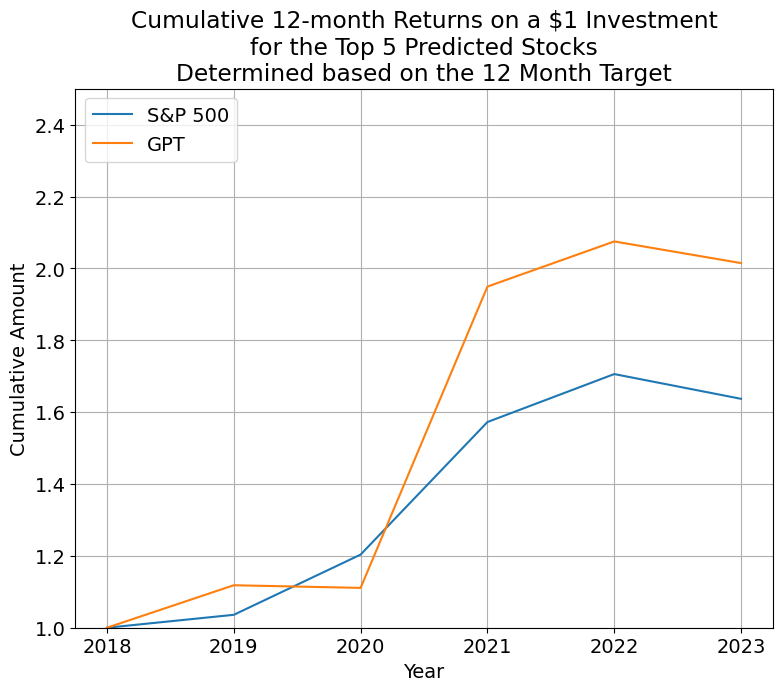

In [18]:
fig, ax = plot_accumulated_value(df_test, 5, returns_col='12m', pred_col='pred_reg_12m',
                                title='Cumulative 12-month Returns on a $1 Investment\nfor the Top 5 Predicted Stocks\nDetermined based on the 12 Month Target')
ax.set_ylim(1, 2.5)
ax.legend(loc='upper left')
fig.savefig('plots/cumulative_12mReturns_12mTarget.png', dpi=300)

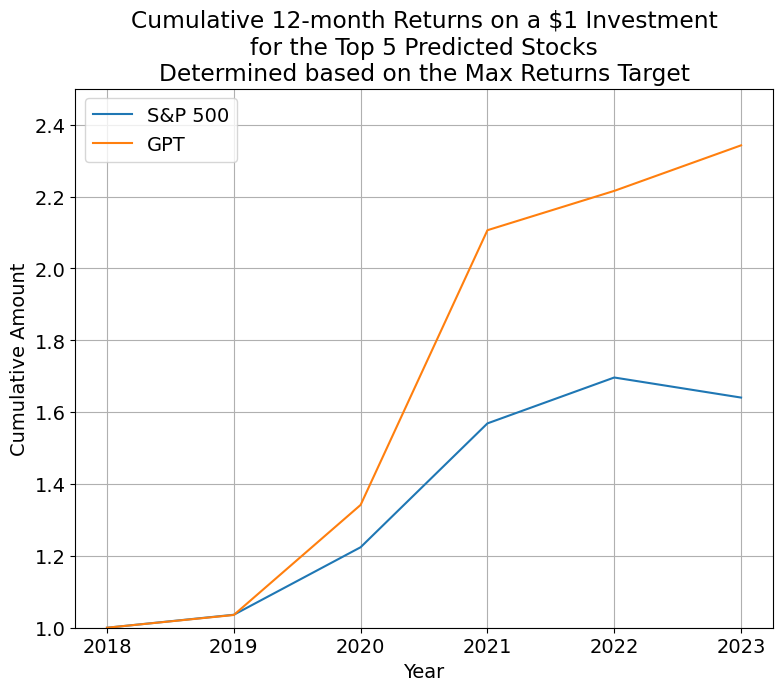

In [19]:
fig, ax = plot_accumulated_value(df_test, 5, returns_col='12m', pred_col='pred_reg_max',
                                title='Cumulative 12-month Returns on a $1 Investment\nfor the Top 5 Predicted Stocks\nDetermined based on the Max Returns Target')
ax.set_ylim(1, 2.5)
ax.legend(loc='upper left')
fig.savefig('plots/cumulative_12mReturns_maxTarget.png', dpi=300)

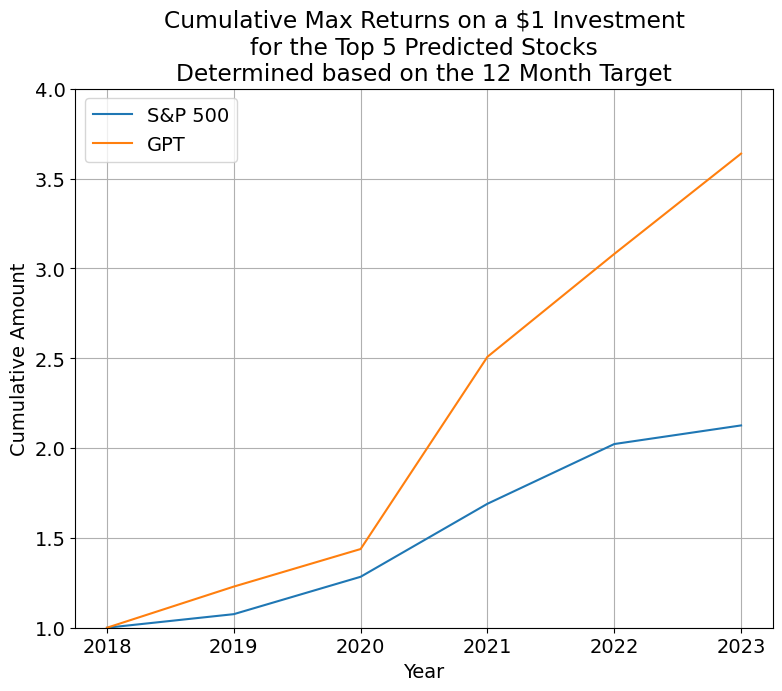

In [20]:
fig, ax = plot_accumulated_value(df_test, 5, returns_col='max', pred_col='pred_reg_12m',
                                title='Cumulative Max Returns on a $1 Investment\nfor the Top 5 Predicted Stocks\nDetermined based on the 12 Month Target')
ax.set_ylim(1, 4)
ax.legend(loc='upper left')
fig.savefig('plots/cumulative_maxReturns_12mTarget.png', dpi=300)

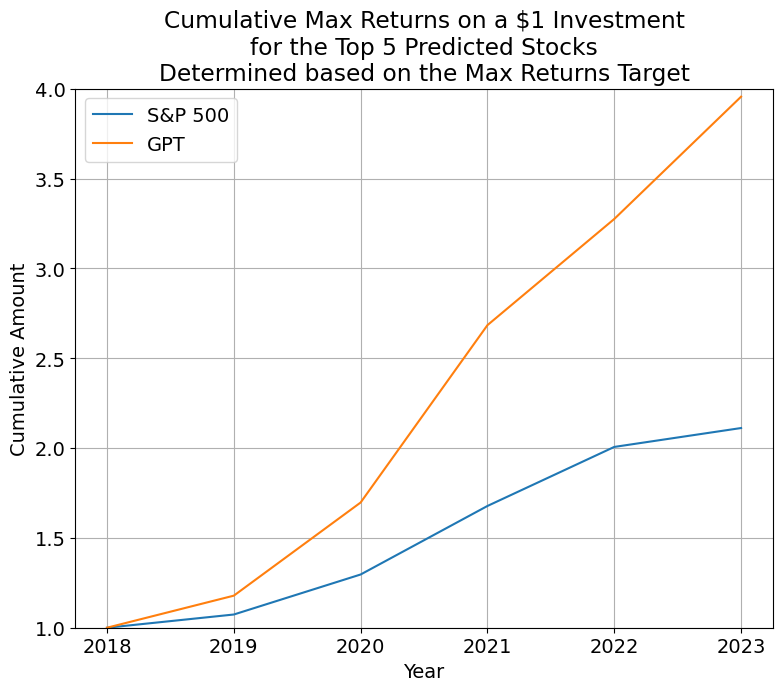

In [21]:
fig, ax = plot_accumulated_value(df_test, 5, returns_col='max', pred_col='pred_reg_max',
                                title='Cumulative Max Returns on a $1 Investment\nfor the Top 5 Predicted Stocks\nDetermined based on the Max Returns Target')
ax.set_ylim(1, 4)
ax.legend(loc='upper left')
fig.savefig('plots/cumulative_maxReturns_maxTarget.png', dpi=300)